In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.integrate as spint
import scipy.interpolate as spinterp
import lmfit
from lmfit import Minimizer, Parameters, report_fit
'''Karan Kumar 14906619'''

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'Karan Kumar 14906619'

In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
#print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


In [3]:
test = stars[stars['Name'] == 'HSC_38']
test

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
271954,HSC_38,1835,4063634658072393984,0,1.000000,269.480534,0.070968,-26.907709,0.059625,3.131261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271955,HSC_38,1835,4063634658085846656,0,0.943917,269.483533,0.068428,-26.899140,0.058114,3.140022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271956,HSC_38,1835,4063634726805334656,1,0.934357,269.446852,0.086676,-26.917035,0.071000,3.108160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271957,HSC_38,1835,4063634829884563968,0,0.992583,269.458755,0.065672,-26.893702,0.053637,3.133681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271958,HSC_38,1835,4063634898590736128,0,0.986327,269.476743,0.370175,-26.878863,0.281034,3.154558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272528,HSC_38,1835,4063626544824264448,1,0.931052,269.307878,0.036860,-27.036679,0.029980,2.942546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
272529,HSC_38,1835,4063626514826891264,1,1.000000,269.325307,0.043212,-27.028509,0.035317,2.957399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
272530,HSC_38,1835,4063626922784970624,1,0.954819,269.287494,0.144384,-27.022264,0.119553,2.945922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
272531,HSC_38,1835,4063626927143789952,1,0.943698,269.282580,0.121411,-27.031187,0.099390,2.936004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0


In [4]:
my_clusters = ['HSC_38', 'Tombaugh_1', 'Gaia_1'] #my assigned clusters

assigned_df = stars[stars['Name'].isin(my_clusters)].copy()

In [5]:
assigned_df['Name'].unique() # i guess it finds the clusters alphabetically
HSC_38 = stars[stars["Name"].isin(["HSC_38"])].copy()
Tombaugh_1 = stars[stars["Name"].isin(["Tombaugh_1"])].copy()
Gaia_1= stars[stars["Name"].isin(["Gaia_1"])].copy()

In [6]:
def radial(df_cluster):
    '''I copied alot of what i did in my assignment 2 per_cluster() function for this
    Calculate the radial seperation between a star and it's cluster postions in RA and DEC
    Calculate the radial seperation between a star and mean position of a cluster
    
    input-
    df_cluster- dataframe of the cluster you want to analyze
    variables:
    radial- the radial speration, as a magnitude'''
    #calculate the means in this order of one cluster
    clusters = df_cluster.copy()
    RA_mean = clusters['RAdeg'].mean()
    DE_mean = clusters['DEdeg'].mean()
    #calculate the radial seperation
    radial = 3600*np.sqrt((np.power(clusters['RAdeg'] - RA_mean,2) + np.power(clusters['DEdeg'] - DE_mean,2)))

    clusters['Radial'] = radial
    return clusters
Gaia_1 =  radial(Gaia_1)
HSC_38  = radial(HSC_38)
Tombaugh_1 = radial(Tombaugh_1)


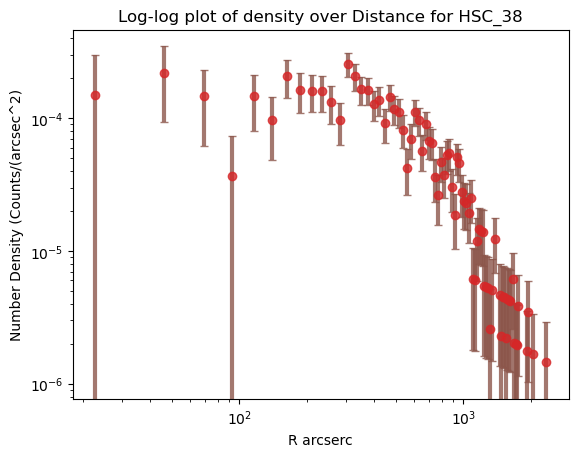

In [7]:
def density_profile(df_cluster,bin_num,color):
    '''This follows my solution from the programming for astronomy course
    compute the area of an annulus using bin edeges as the radius
    return area: the area of each bin'''
    #for plotting
    cluster_name = df_cluster['Name'].unique()[0]
    r_centriod = df_cluster['Radial']
    #r_histo counts of stars in a bin 
    #r_bins number of bins
    r_histo, r_bins = np.histogram(r_centriod,bins=bin_num)
    #r_err, r_err_bins = np.histogram(df_cluster['Radial_err'], bins=bin_num)
    N = len(r_bins)
    bin_area = []
    for i in range(N-1):
        a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
        bin_area.append(a)
    #go around the center of the bin or center of annalus
    r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
    #number of stars per bin
    rho = r_histo/bin_area
    #sqrt rule
    rho_err = np.sqrt(r_histo)/bin_area
    plt.errorbar(r_bin_center, rho, yerr=rho_err,color=color,ecolor='tab:brown',fmt='o',elinewidth=3,capsize=3,alpha=0.8)
    plt.xlabel('R arcserc')
    plt.ylabel('Number Density (Counts/(arcsec^2)')
    plt.xscale('log')
    plt.title('Log-log plot of density over Distance for '+ cluster_name)
    plt.yscale('log')
    plt.show()
    return r_bin_center, rho, rho_err
plot_HSC = density_profile(HSC_38,100,'tab:red') 

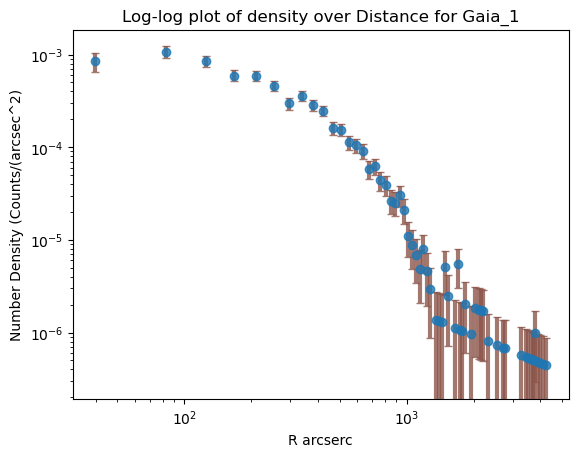

In [8]:
plot_Gaia = density_profile(Gaia_1, 100,'tab:blue')

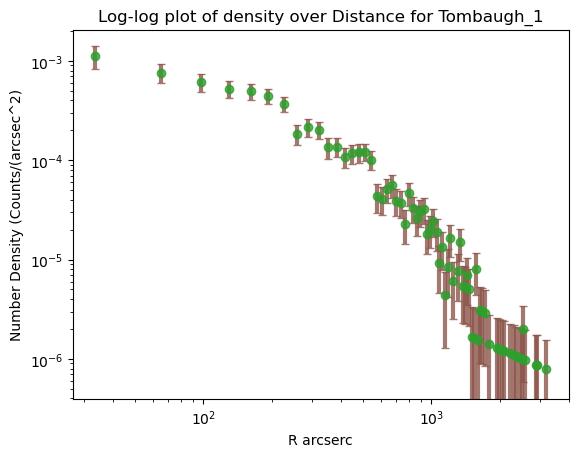

In [9]:
plot_Tombaugh = density_profile(Tombaugh_1, 100,'tab:green')

In [10]:
Gaia_1

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS,Radial
176209,Gaia_1,1746,2946301699100767616,1,0.528004,101.494169,0.151185,-16.764214,0.217537,227.361417,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,47.000107
176210,Gaia_1,1746,2946301630385389952,1,0.773869,101.526641,0.068460,-16.752622,0.099828,227.364563,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,93.069071
176211,Gaia_1,1746,2946301699104875264,1,0.533054,101.497947,0.045210,-16.765246,0.063336,227.363950,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,45.389551
176212,Gaia_1,1746,2946301664745138816,1,0.833860,101.490434,0.026731,-16.768334,0.037307,227.363593,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,66.726131
176213,Gaia_1,1746,2946301729168394752,1,0.642477,101.480309,0.085361,-16.767651,0.115315,227.358699,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,90.735771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177114,Gaia_1,1746,2947052729969764480,1,0.631055,101.450720,0.091496,-16.711108,0.117323,227.294716,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,234.937209
177115,Gaia_1,1746,2947052729969766144,1,0.519829,101.456310,0.096531,-16.715530,0.129628,227.301103,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,209.287255
177116,Gaia_1,1746,2947052734268738816,1,0.542265,101.444492,0.123697,-16.711626,0.159927,227.292559,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,251.442314
177117,Gaia_1,1746,2947052695610021120,1,0.620933,101.435148,0.070034,-16.728233,0.094047,227.303743,...,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,252.529411


# Q2

In [11]:
params = Parameters()  # Assigns a variable name to an empty Parameters object
params.add_many(('rho',10),('rc',30),('rt',130),('C',150))  # Adds multiple parameters, specifying the name and starting value
x = params.valuesdict()

In [12]:
def king_model(r_val,params):
    '''Create a king model 
    input:
    r_val - array of positions
    params- Paramaters() object with added guesses for king model parameters
    variables:
    frac1 , frac2 - fractions in the king model  formula
    x - convert the params values into a dictionary
    king- array of calculated model 
    
    return: 
    king'''
    #initalize y as an array
    #create a parameter dictionary
    x = params.valuesdict()

    frac1 = 1/np.sqrt(1 + (r_val/x['rc']))**2
    frac2 = 1/np.sqrt(1 + (x['rt']/x['rc']))**2
    frac = frac1 - frac2
    king =  x['rho']*frac + x['C']
    #make it a numpy array for convenience
    king = np.array(king)
    #adjust values for king model greater than rt
    king[r_val > x['rt']] = x['C']
    return king


# This is copied directly from Phils Episode 9
## I should explain what it does

In [13]:

def lmf_lsq_resid(params,xdata,ydata,yerrs,model,output_resid=True):
    '''lmfit objective function to calculate and return residual array or model y-values.
        Inputs: params - name of lmfit Parameters object set up for the fit.
                xdata, ydata, yerrs - lists of 1-D arrays of x and y data and y-errors to be fitted.
                    E.g. for 2 data sets to be fitted simultaneously:
                        xdata = [x1,x2], ydata = [y1,y2], yerrs = [err1,err2], where x1, y1, err1
                        and x2, y2, err2 are the 'data', sets of 1-d arrays of length n1, n2 respectively, 
                        where n1 does not need to equal n2.
                    Note that a single data set should also be given via a list, i.e. xdata = [x1],...
                model - the name of the model function to be used (must take params as its input params and
                        return the model y-value array for a given x-value array).
                output_resid - Boolean set to True if the lmfit objective function (residuals) is
                        required output, otherwise a list of model y-value arrays (corresponding to the 
                        input x-data list) is returned.
        Output: if output_resid==True, returns a residual array of (y_i-y_model(x_i))/yerr_i which is
            concatenated into a single array for all input data errors (i.e. length is n1+n2 in 
            the example above). If output_resid==False, returns a list of y-model arrays (one per input x-array)'''
    if output_resid == True:
        for i, xvals in enumerate(xdata):  # loop through each input dataset and record residual array
            if i == 0:
                resid = (ydata[i]-model(xdata[i],params))/yerrs[i]
            else:
                resid = np.append(resid,(ydata[i]-model(xdata[i],params))/yerrs[i])
        return resid
    else:
        ymodel = []
        for i, xvals in enumerate(xdata): # record list of model y-value arrays, one per input dataset
            ymodel.append(model(xdata[i],params))
        return ymodel


In [14]:
def model_bin(xbins, model, params):
    '''General function for integrating the input model over bins defined by contiguous (no gaps) 
        bin edges, xbins.
       Inputs:
           xbins - x bin edges.
           model, params - the model name and associated Parameters object.
       Outputs:
           ymod - calculated counts-density model values for y-axis.'''
    i = 0
    ymod = np.zeros(len(xbins)-1)
    for i, xval in enumerate(xbins[:-1]):
        ymod[i], ymoderr = spint.quad(lambda x: model(x, params),xbins[i],xbins[i+1])
        ymod[i] = ymod[i]/(xbins[i+1]-xbins[i])  # we now divide by the bin width to match the counts density
        # units of our data
    return ymod

def lmf_lsq_binresid(params,xdata,ydata,yerrs,model,output_resid=True):
    '''lmfit objective function to calculate and return residual array or model y-values for
        binned data where the xdata are the input bin edges and ydata are the densities (integral over bin
        divided by bin width).
        Inputs: params - name of lmfit Parameters object set up for the fit.
                xdata, ydata, yerrs - lists of 1-D arrays of x (must be bin edges not bin centres) 
                and y data and y-errors to be fitted.
                    E.g. for 2 data sets to be fitted simultaneously:
                        xdata = [x1,x2], ydata = [y1,y2], yerrs = [err1,err2], where x1, y1, err1
                        and x2, y2, err2 are the 'data', sets of 1-d arrays of length n1 (n1+1 for x2
                        since it is bin edges), n2 (n2+1 for x2) respectively, 
                        where n1 does not need to equal n2.
                    Note that a single data set should also be given via a list, i.e. xdata = [x1],...
                model - the name of the model function to be used (must take params as its input params and
                        return the model y-value array for a given x-value array).
                output_resid - Boolean set to True if the lmfit objective function (residuals) is
                        required output, otherwise a list of model y-value arrays (corresponding to the 
                        input x-data list) is returned.
        Output: if output_resid==True, returns a residual array of (y_i-y_model(x_i))/yerr_i which is
            concatenated into a single array for all input data errors (i.e. length is n1+n2 in 
            the example above). If output_resid==False, returns a list of y-model arrays (one per input x-array)'''
    if output_resid == True:
        for i, xvals in enumerate(xdata):  # loop through each input dataset and record residual array
            if i == 0:
                resid = (ydata[i]-model_bin(xdata[i],model,params))/yerrs[i]
            else:
                resid = np.append(resid,(ydata[i]-model_bin(xdata[i],model,params))/yerrs[i])
        return resid
    else:
        ymodel = []
        for i, xvals in enumerate(xdata): # record list of model y-value arrays, one per input dataset
            ymodel.append(model_bin(xdata[i],model,params))
        return ymodel

In [15]:
def grid1d_chisqmin(a_name,a_range,a_steps,parm,model,xdata,ydata,yerrs):
    '''Uses lmfit. Finds best the fit and then carries out chisq minimisation for a 1D grid of fixed 
       parameters.
       Input: 
            a_name - string, name of 'a' parameter (in input Parameters object parm) to use for grid.
            a_range, a_steps - range (tuple or list) and number of steps for grid.
            parm - lmfit Parameters object for model to be fitted.
            model - name of model function to be fitted.
            xdata, ydata, yerrs - lists of data x, y and y-error arrays (as for the lmf_lsq_resid function)
        Output: 
            a_best - best-fitting value for 'a'
            minchisq - minimum chi-squared (for a_best)
            a_grid - grid of 'a' values used to obtain fits
            chisq_grid - grid of chi-squared values corresponding to a_grid'''
    a_grid = np.linspace(a_range[0],a_range[1],a_steps)
    chisq_grid = np.zeros(len(a_grid))
    # First obtain best-fitting value for 'a' and corresponding chi-squared
    set_function = Minimizer(lmf_lsq_resid, parm, fcn_args=(xdata, ydata, yerrs, model, True),
                             nan_policy='omit')
    result = set_function.minimize(method = 'leastsq')
    minchisq = result.chisqr
    a_best = result.params.valuesdict()[a_name]
    # Now fit for each 'a' in the grid, to do so we use the .add() method for the Parameters object
    # to replace the value of a_name with the value for the grid, setting vary=False to freeze it
    # so it cannot vary in the fit (only the other parameters will be left to vary)
    for i, a_val in enumerate(a_grid):
        parm.add(a_name,value=a_val,vary=False)
        set_function = Minimizer(lmf_lsq_resid, parm, fcn_args=(xdata, ydata, yerrs, model, True), 
                                                                nan_policy='omit')
        result = set_function.minimize(method = 'leastsq')
        chisq_grid[i] = result.chisqr
    return a_best, minchisq, a_grid, chisq_grid 

def calc_error_chisq(delchisq,a_best,minchisq,a_grid,chisq_grid):
    '''Function to return upper and lower values of a parameter 'a' for a given delta-chi-squared
       Input:
           delchisq - the delta-chi-squared for the confidence interval required (e.g. 1 for 1-sigma error)
           a_best, minchisq - best-fitting value for 'a' and corresponding chi-squared minimum
           a_grid, chisq_grid - grid of 'a' and corresponding chi-squared values used for interpolation'''
    # First interpolate over the grid for values > a_best and find upper interval bound
    chisq_interp_upper = spinterp.interp1d(chisq_grid[a_grid > a_best],a_grid[a_grid > a_best])
    a_upper = chisq_interp_upper(minchisq+delchisq)
    # Interpolate for values <= a_best to find lower interval bound
    chisq_interp_lower = spinterp.interp1d(chisq_grid[a_grid <= a_best],a_grid[a_grid <= a_best])
    a_lower = chisq_interp_lower(minchisq+delchisq)  
    return [a_lower,a_upper]

In [16]:
def make_lmf_stuff(df_cluster,clustername,color,param_guess,delchiflt):
    '''Do lmf stuff
    df_cluster- panada dataframe of cluster to analyze
    clustername- str for plotting cluster name
    color- str for plotting
    param_guess- lst inital parameter guess in order, rho, rc, rt, C guesses should be floats or int
    delchiflt, float of sigma confidence interval- either 1.0, 4.0 or 9.0'''
    #bin the datacluster again
    #this is a copy of my desnity_profile() function
    bin_num = 100
    cluster_dist = df_cluster['Radial']
    r_histo, r_bins = np.histogram(cluster_dist, bins=bin_num)
    r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
    N = len(r_bins)
    bin_area = []
    for i in range(N-1):
        a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
        bin_area.append(a)
    #number of stars per bin
    rho = r_histo/bin_area
    #check this later- should i have used real data for this
    rho_err = np.sqrt(r_histo)/bin_area
    #min_guess makes sure the array doesnt change size if omitting nan values
    #instead the minimum guess is zero
    min_guess = 0.0
    params = Parameters()  # Assigns a variable name to an empty Parameters object

    #copied from Lmfit github https://lmfit.github.io/lmfit-py/parameters.html
    #we only care about the first four arguements  in  the tuple
    #VARY- lets us change the guess value whiich is what we want
    # add with tuples: (NAME VALUE VARY MIN)
    params.add_many(('rho',param_guess[0] , True, min_guess),
                ('rc', param_guess[1],True,min_guess),
                ('rt', param_guess[2], True,min_guess),
                ('C', param_guess[3],True,min_guess))
    x = params.valuesdict()
    model = king_model
    output_resid = True

    #for some reason this HAS to be a nested list
    xdata = [r_bins]
    xdata_cen = [r_bin_center] # used in chi intervals
    ydata = [rho]
    yerrs = [rho_err]
    set_function = Minimizer(lmf_lsq_binresid, params, fcn_args=(xdata, ydata, yerrs, model, output_resid), nan_policy='omit')
    result = set_function.minimize(method = 'leastsq')
    print("Model fit for " +clustername)
    report_fit(result)
    print("Minimum Chi-squared = "+str(result.chisqr)+" for "+
      str(result.nfree)+" d.o.f.")
    print("The goodness of fit is: ",sps.chi2.sf(result.chisqr,df=result.nfree))
    model_ens = np.linspace(np.min(xdata), np.max(xdata),1000)
    
    # To calculate the best-fitting model values, use the parameters of the best fit output
    # from the fit, result.params and set output_resid=false to output a list of model y-values:
    model_vals = lmf_lsq_resid(result.params,[model_ens],ydata,yerrs,model,output_resid=False)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.suptitle("Kind Model fit for "+clustername)
    fig.subplots_adjust(hspace=0)
    ax1.scatter(r_bin_center,rho,alpha = 0.5, color=color, label='Data')
    ax1.plot(model_ens, model_vals[0], lw=2,color='tab:purple',label='Model')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax2.errorbar(r_bin_center,
             rho-lmf_lsq_binresid(result.params,xdata,ydata,yerrs,model,output_resid=False)[0],
             yerr=rho_err,marker="o", linestyle="",color=color, ecolor ='tab:brown')

    
    #add labels
    ax1.set_ylabel('Number Density Counts/arcsec^2')
    ax2.set_ylabel("Residuals Counts/arcsec^2")
    ax2.set_xlabel('R arcsec')
    fig.legend()
    plt.savefig(clustername+ "_Kingmodel.png")
    plt.show()
# confidence intervals
 # - ---------------------------------------------------------------------------   
    cluster_name = df_cluster['Name'].unique()[0]
    #coping episode 10 confidence intervals
    model= king_model
    par_names = ['rho','rc','rt', 'C']
    par_ranges= []
    n_steps = 1000
    for i, par_name in enumerate(par_names):
        #min and max best parameters
        par_min = result.params.valuesdict()[par_name] - 6*np.sqrt(result.covar[i,i])
        par_max = result.params.valuesdict()[par_name] + 6*np.sqrt(result.covar[i,i])
        if par_min < 0:
            par_min = 0 
        par_ranges.append([par_min,par_max])
    print("Parameter ranges for grid:",par_ranges)


# For convenience when plotting we will store our results in arrays, which we now set up:
    a_best = np.zeros(len(par_ranges))
    minchisq = np.zeros(len(par_ranges))
    a_grid = np.zeros((len(par_ranges),n_steps))
    chisq_grid = np.zeros((len(par_ranges),n_steps))
    a_int = np.zeros((len(par_ranges),2))
    
    delchisq = delchiflt  # For 1-sigma errors for a single parameter 
    
    #Now do the grid calculation for each parameter:
    for i, par_range in enumerate(par_ranges):
        params2 = Parameters()
        params2.add_many(('rho',param_guess[0] , True, min_guess),
                ('rc', param_guess[1],True,min_guess),
                ('rt', param_guess[2], True,min_guess),
                ('C', param_guess[3],True,min_guess))
        a_best[i], minchisq[i], a_grid[i,:], chisq_grid[i,:] = grid1d_chisqmin(par_names[i],par_range,n_steps,params2,model,
                                 xdata_cen,ydata,yerrs)
        a_int[i,:] = calc_error_chisq(delchisq,a_best[i],minchisq[i],a_grid[i,:],chisq_grid[i,:])
        #Good presentation of results should round off MLE and errors to an appropriate number
        #of decimal places. Here we choose 3 to demonstrate the symmetry of the errors, we 
        #could have used 2 decimal places since that is consistent with the size of the error bars
        print('MLE '+par_names[i]+':',str(np.round(a_best[i],3)),
              'with errors:',str(np.round((a_int[i,:]-a_best[i]),3)))
    
    # Now plot along with a cross to mark the MLE and dotted lines to show the 1-sigma intervals
    par_xlabels = [r'$\rho}$ count/arcsec^2',r'$r_{c}$ arcsec',r'$r_{t}$ (arcsec)','C count/arcsec^2']
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(9,3), sharey=True)
    fig.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.1, hspace=None)
    for i, ax in enumerate([ax1, ax2, ax3,ax4]):
        ax.plot(a_grid[i,:],chisq_grid[i,:],color=color)
        ax.scatter(a_best[i],minchisq[i],marker='+',color=color)
        ax.vlines(a_int[i,:],ymin=30,ymax=100,color='gray',linestyle='dotted')
        ax.set_xlabel(par_xlabels[i],fontsize=12)
    ax1.set_ylabel(r'$\chi^{2}$',fontsize=12)
    ax1.set_ylim(30,100)
    plt.savefig(clustername+"_confidence.png")
    plt.show()
    return result

Model fit for HSC_38
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 114
    # data points      = 75
    # variables        = 4
    chi-square         = 86.4147141
    reduced chi-square = 1.21710865
    Akaike info crit   = 18.6252388
    Bayesian info crit = 27.8951912
[[Variables]]
    rho:  4.3739e-04 +/- 1.2674e-04 (28.98%) (init = 0.0001)
    rc:   1708.66664 +/- 1204.81077 (70.51%) (init = 100)
    rt:   1231.77753 +/- 36.3037118 (2.95%) (init = 400)
    C:    2.8729e-06 +/- 5.6931e-07 (19.82%) (init = 1e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho, rc) = +0.9672
    C(rho, rt) = -0.7241
    C(rc, rt)  = -0.6130
    C(rt, C)   = -0.1912
Minimum Chi-squared = 86.41471412364234 for 71 d.o.f.
The goodness of fit is:  0.10287965810318718


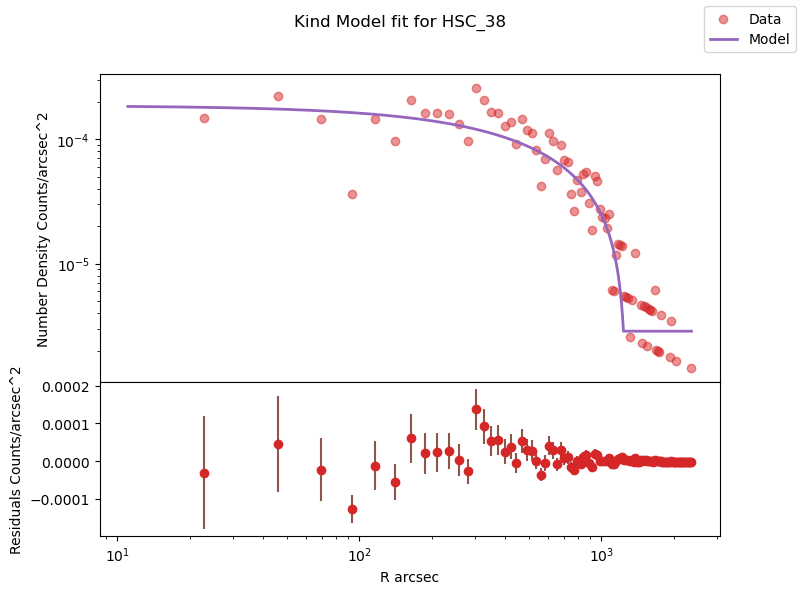

Parameter ranges for grid: [[0, 0.0011978099779145137], [0, 8937.53125156073], [1013.9552572678983, 1449.5997986877348], [0, 6.288781379059313e-06]]
MLE rho: 0.0 with errors: [-0.  0.]
MLE rc: 1734.675 with errors: [-701.888 7032.29 ]
MLE rt: 1230.125 with errors: [-75.51   47.298]
MLE C: 0.0 with errors: [-0.  0.]


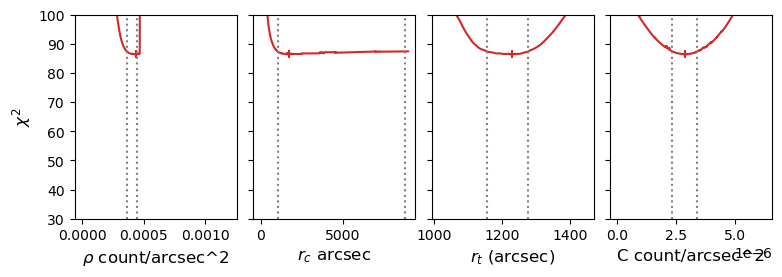

In [17]:
HSC_guess = [1e-4,100,400,1e-5] #old guess before confidience interval [10, 30,130,150]
HSCresult= make_lmf_stuff(HSC_38,"HSC_38",'tab:red',HSC_guess,1.0)

Model fit for GAIA_1
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 150
    # data points      = 60
    # variables        = 4
    chi-square         = 63.3805164
    reduced chi-square = 1.13179494
    Akaike info crit   = 11.2887164
    Bayesian info crit = 19.6660946
[[Variables]]
    rho:  0.00220021 +/- 4.0115e-04 (18.23%) (init = 0.001)
    rc:   80.8050939 +/- 21.2630211 (26.31%) (init = 70)
    rt:   1078.82765 +/- 21.2727006 (1.97%) (init = 100)
    C:    7.5007e-07 +/- 1.3757e-07 (18.34%) (init = 1e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho, rc) = -0.9704
    C(rc, rt)  = -0.3924
    C(rho, rt) = +0.2650
Minimum Chi-squared = 63.380516367711024 for 56 d.o.f.
The goodness of fit is:  0.2322981121533345


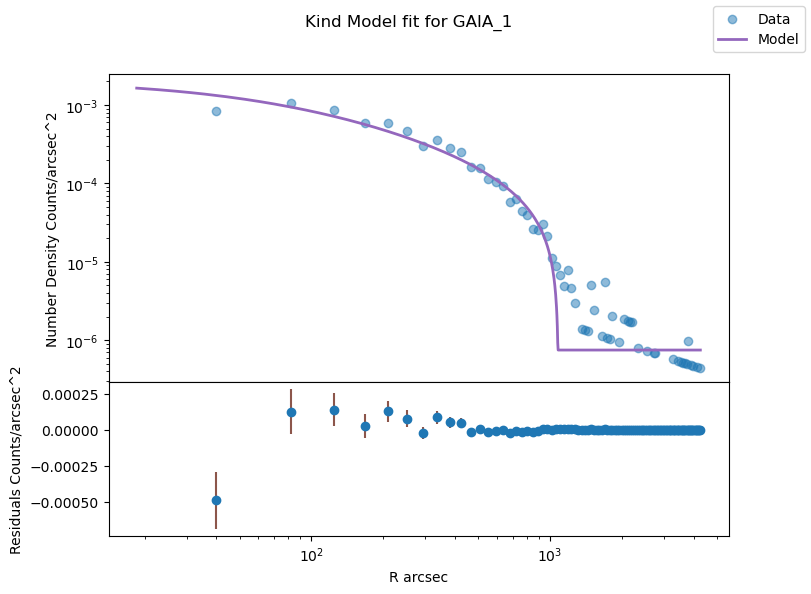

Parameter ranges for grid: [[0, 0.0046071340773348735], [0, 208.38322066723424], [951.191442420374, 1206.463850100539], [0, 1.57550567916977e-06]]
MLE rho: 0.002 with errors: [-0.  0.]
MLE rc: 86.116 with errors: [-29.349  20.742]
MLE rt: 1055.044 with errors: [-20.732  70.255]
MLE C: 0.0 with errors: [-0.  0.]


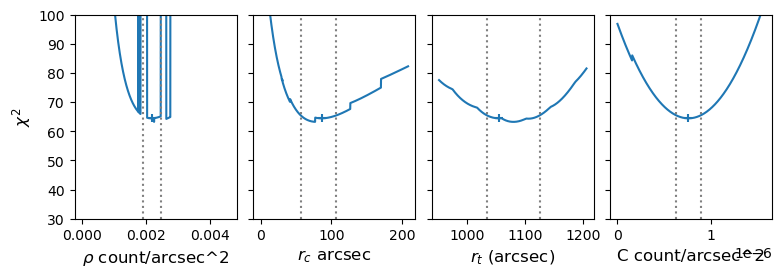

In [18]:
Gaia_guess = [0.001,70,100,1e-05]
Gaia_fit = make_lmf_stuff(Gaia_1, 'GAIA_1','tab:blue',Gaia_guess,1.0)

Model fit for Tombaugh_1
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 158
    # data points      = 67
    # variables        = 4
    chi-square         = 64.6190250
    reduced chi-square = 1.02569881
    Akaike info crit   = 5.57568888
    Bayesian info crit = 14.3944594
[[Variables]]
    rho:  0.00356270 +/- 0.00166219 (46.66%) (init = 1)
    rc:   21.3366735 +/- 11.2073669 (52.53%) (init = 200)
    rt:   1302.62663 +/- 40.3129072 (3.09%) (init = 500)
    C:    1.3858e-06 +/- 2.5480e-07 (18.39%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho, rc) = -0.9937
    C(rc, rt)  = -0.3492
    C(rho, rt) = +0.2905
    C(rt, C)   = -0.1522
Minimum Chi-squared = 64.6190249511353 for 63 d.o.f.
The goodness of fit is:  0.41983046714460825


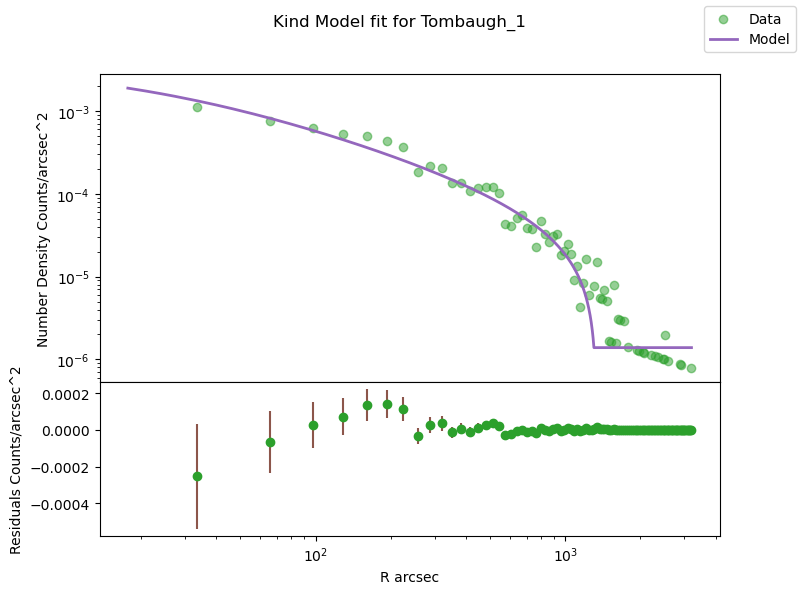

Parameter ranges for grid: [[0, 0.013535844360540257], [0, 88.58087501825071], [1060.7491899991371, 1544.5040763730965], [0, 2.9146311523664886e-06]]
MLE rho: 0.004 with errors: [-0.002  0.   ]
MLE rc: 20.218 with errors: [-17.829  22.201]
MLE rt: 1294.17 with errors: [-65.985 211.845]
MLE C: 0.0 with errors: [-0.  0.]


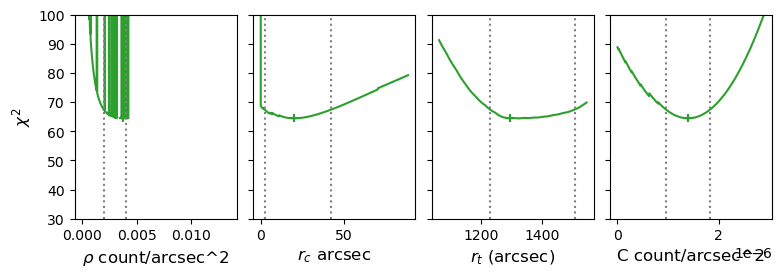

In [19]:
Tombaugh_guess = [1, 200, 500, 1]
Tombaugh_fit = make_lmf_stuff(Tombaugh_1, 'Tombaugh_1','tab:green',Tombaugh_guess,3.0)

In [20]:
def another_density_profile(df_cluster,bin_num):
    '''This follows my solution from the programming for astronomy course
    compute the area of an annulus using bin edeges as the radius
    return area: the area of each bin
    same as old one only without plotting'''
    #for plotting
    cluster_name = df_cluster['Name'].unique()[0]
    r_centriod = df_cluster['Radial']
    #r_histo counts of stars in a bin 
    #r_bins number of bins
    r_histo, r_bins = np.histogram(r_centriod,bins=bin_num)
    #r_err, r_err_bins = np.histogram(df_cluster['Radial_err'], bins=bin_num)
    N = len(r_bins)
    bin_area = []
    for i in range(N-1):
        a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
        bin_area.append(a)
    #go around the center of the bin or center of annalus
    r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
    #number of stars per bin
    rho = r_histo/bin_area
    #check this later- should i have used real data for this
    rho_err = np.sqrt(r_histo)/bin_area
    return r_bin_center,rho,rho_err

In [21]:
def subsample(df_cluster,percent,splitchoice):
    '''Split a cluster into two subsamples, by Gmag and mean proper motion
    I DONT USE THIS'''
    #columns Gmag and Mean PM, create the Mean PM
    cluster_name = df_cluster['Name'].unique()[0]
    copy_dataframe = df_cluster.copy()
    #calculate the mean PM
    proper_motion_mag = (df_cluster['pmRA'].mean())**2 + (df_cluster['pmDE'].mean())**2
    proper_motion_mag = np.sqrt(proper_motion_mag)
    copy_dataframe["PM" ] = proper_motion_mag

    PM_median = copy_dataframe['PM'].median()
    Gmag_median = copy_dataframe['Gmag'].median()

    PM_below_median = copy_dataframe[copy_dataframe['PM'] <= PM_median]
    PM_after_median = copy_dataframe[copy_dataframe['PM'] >= PM_median]

    G_below_median = copy_dataframe[copy_dataframe['Gmag'] <= Gmag_median]
    G_after_median = copy_dataframe[copy_dataframe['Gmag'] >= Gmag_median]
    bin_num = 20
    # argurements = df_cluster, bin_num, color
    PMbelow_den = another_density_profile(PM_below_median, bin_num)
    PMafter_den = another_density_profile(PM_after_median, bin_num)
    Gbelow_den = another_density_profile(G_below_median, bin_num)
    Gafter_den = another_density_profile(G_after_median, bin_num)
 
    return None
Gaia_samp = subsample(Gaia_1,'25',"Gmag")

In [22]:
def lmf_stuff_again(main_df,sample_df_1,sample_df_2,param_guess,splitchoice):
    ''' Modify the king model to run a fit on three cluster
        main_df, sample_df_1, sample_df_2- panada dataframe of cluster to analyze
    param_guess- lst inital parameter guess in order, rho, rc, rt, C guesses should be floats or int
    splitchoice- str Gmag or PM'''
    cluster_list = [main_df, sample_df_1, sample_df_2]
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    labels = ['Total', '25%','75%']
    clustername = main_df['Name'].unique()[0]
    bin_num = 100
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.suptitle("Percentile Splitting for "+clustername+" by "+str(splitchoice))
    result_arr = []
    for j, df_cluster in enumerate(cluster_list):
            cluster_dist = df_cluster['Radial']
            r_histo, r_bins = np.histogram(cluster_dist, bins=bin_num)
            r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
            N = len(r_bins)
            bin_area = []
            for i in range(N-1):
                a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
                bin_area.append(a)
            #number of stars per bin
            rho = r_histo/bin_area
            #check this later- should i have used real data for this
            rho_err = np.sqrt(r_histo)/bin_area
            #min_guess makes sure the array doesnt change size if omitting nan values
            #instead the minimum guess is zero
            min_guess = 0.0
            params = Parameters()  # Assigns a variable name to an empty Parameters object
        
            #copied from Lmfit github https://lmfit.github.io/lmfit-py/parameters.html
            #we only care about the first four arguements  in  the tuple
            #VARY- lets us change the guess value whiich is what we want
            # add with tuples: (NAME VALUE VARY MIN)
            params.add_many(('rho',param_guess[0] , True, min_guess),
                        ('rc', param_guess[1],True,min_guess),
                        ('rt', param_guess[2], True,min_guess),
                        ('C', param_guess[3],True,min_guess))
            x = params.valuesdict()
            model = king_model
            output_resid = True
        
            #for some reason this HAS to be a nested list
            xdata = [r_bins]
            xdata_cen = [r_bin_center] # used in chi intervals
            ydata = [rho]
            yerrs = [rho_err]
            set_function = Minimizer(lmf_lsq_binresid, params, fcn_args=(xdata, ydata, yerrs, model, output_resid), nan_policy='omit')
            result = set_function.minimize(method = 'leastsq')
            result_arr.append(result)
            # print("Model fit for " +clustername)
            # report_fit(result)
            # print("Minimum Chi-squared = "+str(result.chisqr)+" for "+
            #   str(result.nfree)+" d.o.f.")
            # print("The goodness of fit is: ",sps.chi2.sf(result.chisqr,df=result.nfree))
            model_ens = np.linspace(np.min(xdata), np.max(xdata),1000)
            
            # To calculate the best-fitting model values, use the parameters of the best fit output
            # from the fit, result.params and set output_resid=false to output a list of model y-values:
            model_vals = lmf_lsq_resid(result.params,[model_ens],ydata,yerrs,model,output_resid=False)
            ax1.scatter(r_bin_center,rho,alpha = 0.5, color=colors[j], label=labels[j])
            ax1.plot(model_ens, model_vals[0], lw=2,color=colors[j])
            ax1.set_xscale('log')
            ax1.set_yscale('log')
            ax2.errorbar(r_bin_center,
                 rho-lmf_lsq_binresid(result.params,xdata,ydata,yerrs,model,output_resid=False)[0],
                 yerr=rho_err,marker="o", linestyle="",color=colors[j], ecolor ='tab:brown')
    
            
        #add labels
    ax1.set_ylabel('Number Density Counts/arcsec^2')
    ax2.set_ylabel("Residuals Counts/arcsec^2")
    ax2.set_xlabel('R arcsec')
    fig.legend()
    plt.show()
    return result_arr

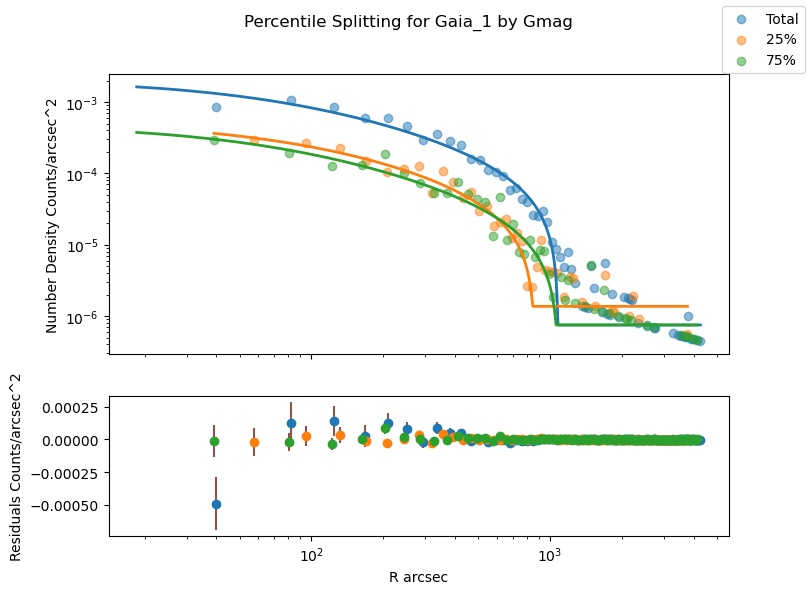

In [23]:

def percents(df_cluster,splitchoice,param_guess):
    '''Split a dataframe into two percetile ranges, compute a subsample density profile
    Splitchoice str- a column in the dataframe in out example Gmag or mean PM'''
    #work with a copy of the dataframe
    #calculate the proper motion
    df_cluster = df_cluster.copy()
    proper_motion_mag = (df_cluster['pmRA'])**2 + (df_cluster['pmDE'])**2
    proper_motion_mag = np.sqrt(proper_motion_mag)
    df_cluster["PM"] = proper_motion_mag

    percentile_range = (25, 75)  # define a percentile range
    #i asked chatgpt for the quantile function
    # Calculate the lower and upper bounds for the percentile range
    per25 = df_cluster[splitchoice].quantile(percentile_range[0] / 100)
    per75= df_cluster[splitchoice].quantile(percentile_range[1] / 100)

    # Filter the DataFrame based on the percentile range
    df25 = df_cluster[df_cluster[splitchoice] <= per25]
    df75 = df_cluster[df_cluster[splitchoice] >= per75]
    #run subsample on both percentile ranges
    samp25 = subsample(df25, '25',splitchoice)
    samp75 = subsample(df75, '75',splitchoice)

    test = lmf_stuff_again(df_cluster, df25, df75, param_guess,splitchoice)
    
    return test
    
Gaia_gmag = percents(Gaia_1,"Gmag", Gaia_guess)
#Gaia_percent_PM = percents(Gaia_1, "PM",Gaia_guess)

In [24]:
def report_percents(report_list,clustername,splitchoice):
    '''Report the results of each sampled cluster'''
    sample = ['total sample','25% percentile', '75% percentile']
    for i, results in enumerate(report_list):
        print(clustername + " best fit for "+sample[i]+" Split by "+splitchoice+" Median")
        print("N = "+str(results.ndata))
        print("Reduced chi ="+str(results.redchi))
        m = results.nfree # degrees of freedom in fit
        print("p-value for our reduced chi-squared: ",sps.chi2.sf(results.redchi,df=m),"for",m,"fewer constraints.")
        display(report_list[i].params)
report_gaia = report_percents(Gaia_gmag, "Gaia_1",'Gmag')

Gaia_1 best fit for total sample Split by Gmag Median
N = 60
Reduced chi =1.1317949351376968
p-value for our reduced chi-squared:  1.0 for 56 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00220021,4.0115e-04,(18.23%),0.001,0.00000000,inf,True
rc,80.8050939,21.2630211,(26.31%),70,0.00000000,inf,True
rt,1078.82765,21.2727006,(1.97%),100,0.00000000,inf,True
C,7.5007e-07,1.3757e-07,(18.34%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 25% percentile Split by Gmag Median
N = 40
Reduced chi =0.7078348303005575
p-value for our reduced chi-squared:  1.0 for 36 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,5.9136e-04,1.8398e-04,(31.11%),0.001,0.00000000,inf,True
rc,100.645934,52.3686136,(52.03%),70,0.00000000,inf,True
rt,846.681444,26.9989665,(3.19%),100,0.00000000,inf,True
C,1.3678e-06,2.7012e-07,(19.75%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 75% percentile Split by Gmag Median
N = 46
Reduced chi =0.7618219217658951
p-value for our reduced chi-squared:  1.0 for 42 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,5.1061e-04,1.8283e-04,(35.81%),0.001,0.00000000,inf,True
rc,74.4463255,38.0687866,(51.14%),70,0.00000000,inf,True
rt,1059.68587,41.8362888,(3.95%),100,0.00000000,inf,True
C,7.4914e-07,1.5324e-07,(20.46%),1e-05,0.00000000,inf,True


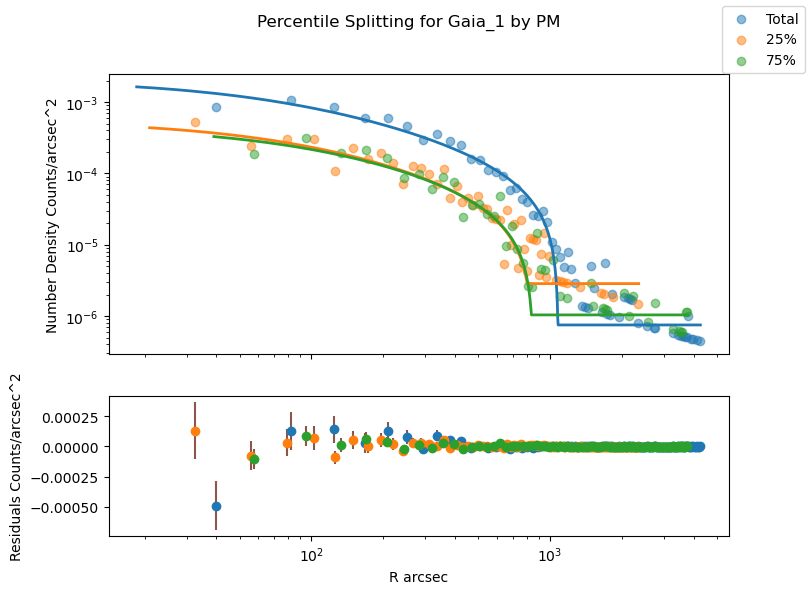

Gaia_1 best fit for total sample Split by PM Median
N = 60
Reduced chi =1.1317949351376968
p-value for our reduced chi-squared:  1.0 for 56 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00220021,4.0115e-04,(18.23%),0.001,0.00000000,inf,True
rc,80.8050939,21.2630211,(26.31%),70,0.00000000,inf,True
rt,1078.82765,21.2727006,(1.97%),100,0.00000000,inf,True
C,7.5007e-07,1.3757e-07,(18.34%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 25% percentile Split by PM Median
N = 51
Reduced chi =0.7398449078131287
p-value for our reduced chi-squared:  1.0 for 47 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,6.1047e-04,1.9209e-04,(31.47%),0.001,0.00000000,inf,True
rc,92.7162788,50.2217782,(54.17%),70,0.00000000,inf,True
rt,801.838681,37.3150595,(4.65%),100,0.00000000,inf,True
C,2.8506e-06,5.8784e-07,(20.62%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 75% percentile Split by PM Median
N = 44
Reduced chi =0.856485847465905
p-value for our reduced chi-squared:  1.0 for 40 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,5.2490e-04,1.6212e-04,(30.89%),0.001,0.00000000,inf,True
rc,112.741174,61.6387252,(54.67%),70,0.00000000,inf,True
rt,835.006566,29.9639718,(3.59%),100,0.00000000,inf,True
C,1.0377e-06,1.9913e-07,(19.19%),1e-05,0.00000000,inf,True


In [25]:
Gaia_pm = percents(Gaia_1, 'PM', Gaia_guess)
report_pm_gaia = report_percents(Gaia_pm, 'Gaia_1', 'PM')
#here is wrong im taking the exact same samples

# Repeat for the other two clusters

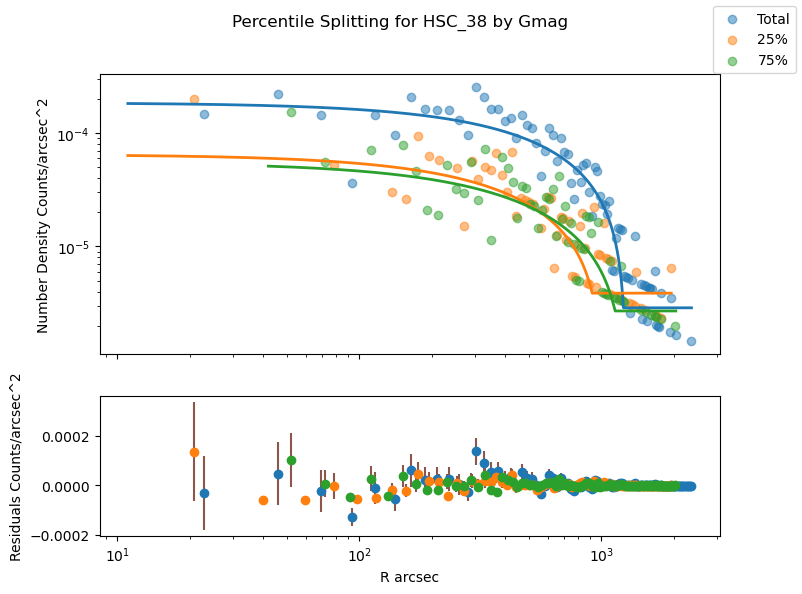

HSC_38 best fit for total sample Split by Gmag Median
N = 75
Reduced chi =1.2171086496287653
p-value for our reduced chi-squared:  1.0 for 71 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,4.3739e-04,1.2674e-04,(28.98%),0.0001,0.00000000,inf,True
rc,1708.66664,1204.81077,(70.51%),100,0.00000000,inf,True
rt,1231.77753,36.3037118,(2.95%),400,0.00000000,inf,True
C,2.8729e-06,5.6931e-07,(19.82%),1e-05,0.00000000,inf,True


HSC_38 best fit for 25% percentile Split by Gmag Median
N = 61
Reduced chi =0.5392327442767048
p-value for our reduced chi-squared:  1.0 for 57 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.4093e-04,7.8299e-05,(55.56%),0.0001,0.00000000,inf,True
rc,1197.82368,1728.73117,(144.32%),100,0.00000000,inf,True
rt,915.379987,61.5369735,(6.72%),400,0.00000000,inf,True
C,3.8713e-06,5.6535e-07,(14.60%),1e-05,0.00000000,inf,True


HSC_38 best fit for 75% percentile Split by Gmag Median
N = 60
Reduced chi =0.5129455662048806
p-value for our reduced chi-squared:  1.0 for 56 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.0046e-04,2.5793e-05,(25.68%),0.0001,0.00000000,inf,True
rc,1040.66393,1054.91102,(101.37%),100,0.00000000,inf,True
rt,1137.67619,70.7354761,(6.22%),400,0.00000000,inf,True
C,2.6948e-06,5.6544e-07,(20.98%),1e-05,0.00000000,inf,True


In [26]:
# Gaia_pm = percents(Gaia_1, 'PM', Gaia_guess)
# report_pm_gaia = report_percents(Gaia_pm, 'Gaia_1', 'PM')
HSC_gmag = percents(HSC_38, 'Gmag', HSC_guess)
report_gmag_HSC = report_percents(HSC_gmag, "HSC_38", "Gmag")

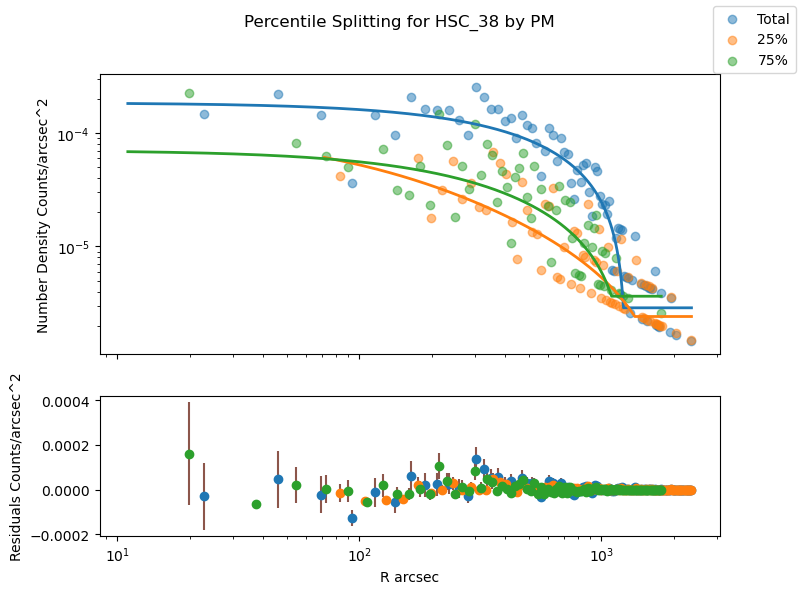

HSC_38 best fit for total sample Split by PM Median
N = 75
Reduced chi =1.2171086496287653
p-value for our reduced chi-squared:  1.0 for 71 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,4.3739e-04,1.2674e-04,(28.98%),0.0001,0.00000000,inf,True
rc,1708.66664,1204.81077,(70.51%),100,0.00000000,inf,True
rt,1231.77753,36.3037118,(2.95%),400,0.00000000,inf,True
C,2.8729e-06,5.6931e-07,(19.82%),1e-05,0.00000000,inf,True


HSC_38 best fit for 25% percentile Split by PM Median
N = 67
Reduced chi =0.5904171644878249
p-value for our reduced chi-squared:  1.0 for 63 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.0706e-04,8.3088e-05,(77.61%),0.0001,0.00000000,inf,True
rc,122.584848,147.945750,(120.69%),100,0.00000000,inf,True
rt,1371.01633,180.247636,(13.15%),400,0.00000000,inf,True
C,2.4074e-06,4.0502e-07,(16.82%),1e-05,0.00000000,inf,True


HSC_38 best fit for 75% percentile Split by PM Median
N = 56
Reduced chi =0.7547441016723199
p-value for our reduced chi-squared:  1.0 for 52 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.0410e-04,1.5484e-05,(14.87%),0.0001,0.00000000,inf,True
rc,608.429001,630.053941,(103.55%),100,0.00000000,inf,True
rt,1099.81502,108.698163,(9.88%),400,0.00000000,inf,True
C,3.6365e-06,1.2647e-06,(34.78%),1e-05,0.00000000,inf,True


In [27]:
HSC_pm = percents(HSC_38, 'PM', HSC_guess)
report_pm_HSC = report_percents(HSC_pm, "HSC_38", "PM")


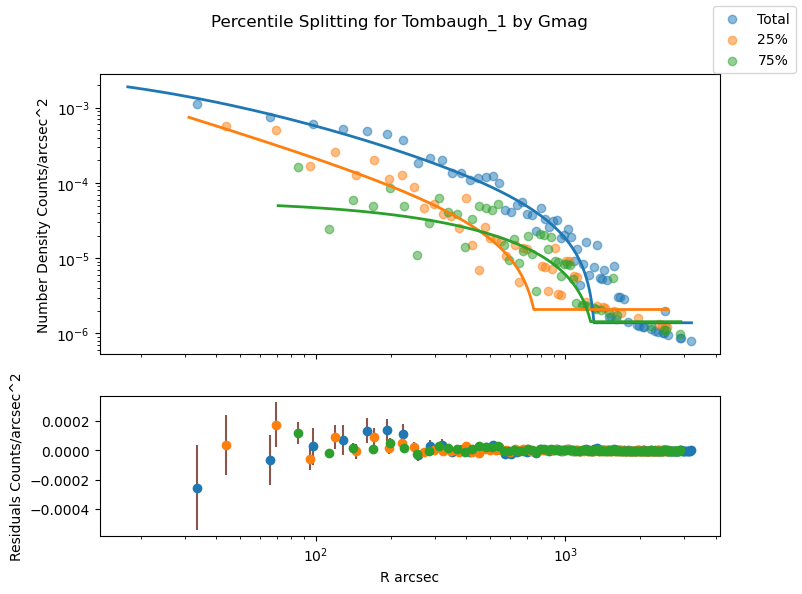

Tombaugh_1 best fit for total sample Split by Gmag Median
N = 67
Reduced chi =1.0256988087481793
p-value for our reduced chi-squared:  1.0 for 63 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00356270,0.00166219,(46.66%),1,0.00000000,inf,True
rc,21.3366735,11.2073669,(52.53%),200,0.00000000,inf,True
rt,1302.62663,40.3129072,(3.09%),500,0.00000000,inf,True
C,1.3858e-06,2.5480e-07,(18.39%),1,0.00000000,inf,True


Tombaugh_1 best fit for 25% percentile Split by Gmag Median
N = 48
Reduced chi =0.7826459896995052
p-value for our reduced chi-squared:  1.0 for 44 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,29.5744297,602929.889,(2038686.44%),1,0.00000000,inf,True
rc,8.1423e-04,16.6997295,(2050973.10%),200,0.00000000,inf,True
rt,747.810013,67.7041572,(9.05%),500,0.00000000,inf,True
C,2.0805e-06,4.0631e-07,(19.53%),1,0.00000000,inf,True


Tombaugh_1 best fit for 75% percentile Split by Gmag Median
N = 50
Reduced chi =0.9228117953206041
p-value for our reduced chi-squared:  1.0 for 46 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,8.6046e-05,1.1817e-05,(13.73%),1,0.00000000,inf,True
rc,644.543613,627.596572,(97.37%),200,0.00000000,inf,True
rt,1263.11708,93.0037277,(7.36%),500,0.00000000,inf,True
C,1.4323e-06,4.4415e-07,(31.01%),1,0.00000000,inf,True


In [28]:
# HSC_gmag = percents(HSC_38, 'Gmag', HSC_guess)
# report_gmag_HSC = report_percents(HSC_gmag, "HSC_38", "Gmag")
Tombaugh_gmag = percents(Tombaugh_1, 'Gmag', Tombaugh_guess)
report_gmag_Tombaugh =report_percents(Tombaugh_gmag, "Tombaugh_1", "Gmag")



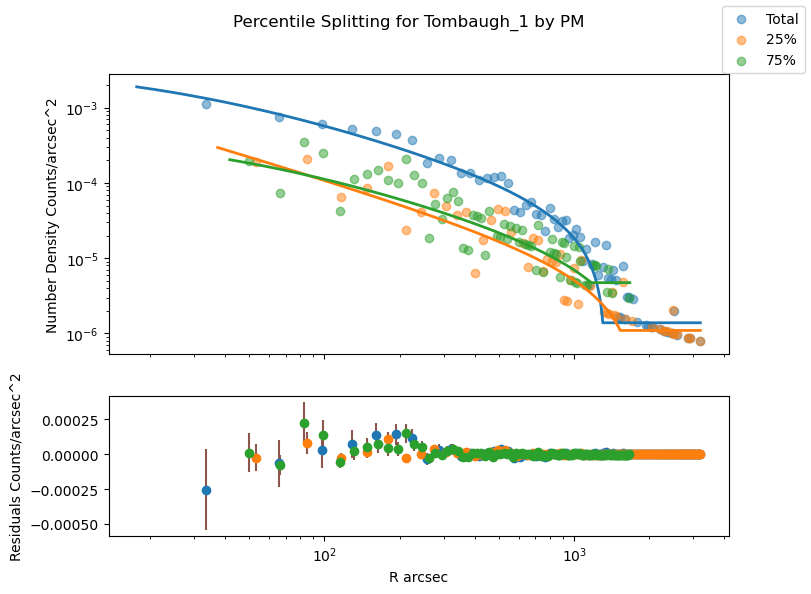

Tombaugh_1 best fit for total sample Split by PM Median
N = 67
Reduced chi =1.0256988087481793
p-value for our reduced chi-squared:  1.0 for 63 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00356270,0.00166219,(46.66%),1,0.00000000,inf,True
rc,21.3366735,11.2073669,(52.53%),200,0.00000000,inf,True
rt,1302.62663,40.3129072,(3.09%),500,0.00000000,inf,True
C,1.3858e-06,2.5480e-07,(18.39%),1,0.00000000,inf,True


Tombaugh_1 best fit for 25% percentile Split by PM Median
N = 53
Reduced chi =0.8453414415820376
p-value for our reduced chi-squared:  1.0 for 49 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.01623934,0.51332906,(3161.02%),1,0.00000000,inf,True
rc,0.70774605,22.5773423,(3190.03%),200,0.00000000,inf,True
rt,1529.57978,149.163524,(9.75%),500,0.00000000,inf,True
C,1.0960e-06,2.6640e-07,(24.31%),1,0.00000000,inf,True


Tombaugh_1 best fit for 75% percentile Split by PM Median
N = 63
Reduced chi =0.68593993456644
p-value for our reduced chi-squared:  1.0 for 59 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,4.6555e-04,4.5515e-04,(97.77%),1,0.00000000,inf,True
rc,35.0473358,41.8328962,(119.36%),200,0.00000000,inf,True
rt,1170.73819,175.552910,(15.00%),500,0.00000000,inf,True
C,4.7277e-06,1.2960e-06,(27.41%),1,0.00000000,inf,True


In [29]:
Tombaugh_pm = percents(Tombaugh_1, 'PM', Tombaugh_guess)
report_pm_Tombaugh =report_percents(Tombaugh_pm, "Tombaugh_1", "PM")